<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import statsmodels.api as sm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

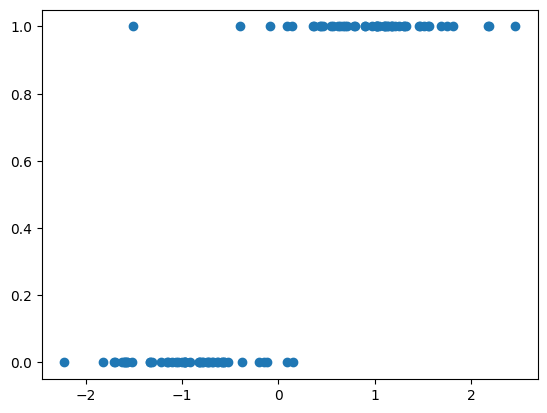

In [5]:
x1, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(x1, y)

In [7]:
print(len(x1))
print(len(y))

100
100


In [8]:
print(x1[:5])

[[-0.56511345]
 [ 1.81256131]
 [-1.33619806]
 [ 1.74890611]
 [-0.19702637]]


In [9]:
print(y[:5])

[0 1 0 1 0]


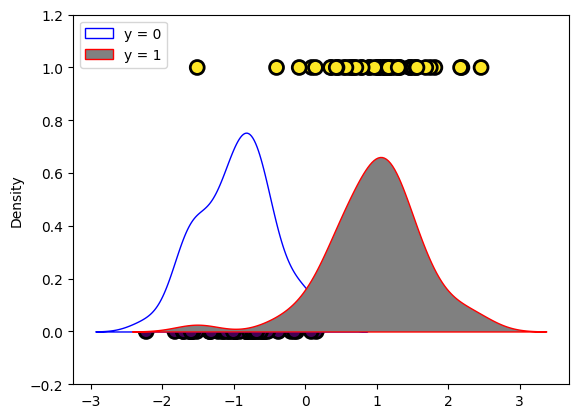

In [15]:
plt.scatter(x1, y, c=y, s=100, edgecolors='k', linewidths=2)
sns.kdeplot(x1[y == 0, :], label = 'y = 0', fill=True, ec='blue', fc='white')
sns.kdeplot(x1[y == 1, :], label = 'y = 1', fill=True, ec='red', fc='gray')
plt.legend(); plt.ylim(-0.2, 1.2)
plt.show()